# Neural Responses to Transcranial Focused Ultrasound Stimulation in Rat Somatosensory Cortex

## AI-Generated Notebook

**IMPORTANT**: This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified. Please be cautious when interpreting the code and results. Always refer to the original publication for authoritative information.

This notebook explores and analyzes Dandiset 000945, which contains neural spiking data recorded from the somatosensory cortex of awake rats responding to transcranial focused ultrasound stimulation (tFUS). The dataset includes recordings with different pulse repetition frequencies (PRFs) of ultrasound stimulation.

## Introduction

Dandiset 000945 contains neural spiking data from recordings in the awake rat somatosensory cortex during transcranial focused ultrasound stimulation. The dataset includes:

- Chronic electrophysiological recordings acquired using 32-channel NeuroNexus electrodes
- Ultrasound stimulation delivered every ~2.5 seconds with a 10% jitter
- 500 trials per recording
- Different pulse repetition frequencies (PRFs): 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz
- Each with a 200 microsecond pulse duration and 67 ms ultrasound duration
- Data from multiple subjects, with recordings taken first at 8-10 months of age and then some repeats at 12 months

This notebook will demonstrate how to:
1. Load and explore the dataset using the DANDI API
2. Access and visualize neural spiking data from NWB files
3. Analyze neural responses to ultrasound stimulation
4. Compare responses across different cell types and stimulation parameters

## Required Packages

This notebook requires the following packages:

- `dandi`: For accessing the DANDI archive
- `pynwb`: For working with NWB files
- `lindi`: For loading NWB files from the DANDI archive
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `seaborn`: For enhanced visualization (optional)

These should already be installed on your system, but if not, you'll need to install them before running this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import lindi
from dandi.dandiapi import DandiAPIClient

# Set up plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## Accessing the Dandiset

First, let's use the DANDI API to access the dataset and explore its structure. We'll list all assets (NWB files) in Dandiset 000945.

In [2]:
# Connect to the DANDI API
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

Let's examine the metadata of this Dandiset to understand what it contains.

In [3]:
# Print basic information about the Dandiset
dandiset_metadata = dandiset.get_metadata()
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset Name: {dandiset_metadata.name}")
print(f"Description: {dandiset_metadata.description[:500]}...")
print(f"Number of assets: {len(assets)}")

# Group assets by subject
subjects = {}
for asset in assets:
    subject_id = asset.path.split('/')[0]
    if subject_id not in subjects:
        subjects[subject_id] = []
    subjects[subject_id].append(asset)

print("\nSubjects in this Dandiset:")
for subject_id, files in subjects.items():
    print(f"{subject_id}: {len(files)} files")

Dandiset ID: 000945
Dandiset Name: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation
Description: In these recordings, we tested different PRFs (pulse repetition frequencies) of ultrasound stimulation using a 128-element random array ultrasound transducer to stimulate the somatosensory cortex of awake head-fixed rats. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32), chronically implanted into the rat brain. Ultrasound stimulation is delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trial...
Number of assets: 75

Subjects in this Dandiset:
sub-BH498: 13 files
sub-BH506: 9 files
sub-BH508: 10 files
sub-BH512: 12 files
sub-BH519: 5 files
sub-BH521: 5 files
sub-BH526: 7 files
sub-BH527: 5 files
sub-BH497: 5 files
sub-BH514: 4 files


Now let's examine the structure of the files for a specific subject to understand the organization of the data.

In [4]:
# Choose a subject (e.g., BH497) and list its files
subject_id = "sub-BH497"
subject_files = subjects[subject_id]

print(f"Files for subject {subject_id}:")
for asset in subject_files:
    print(f"  - {asset.path} (Asset ID: {asset.identifier})")

Files for subject sub-BH497:
  - sub-BH497/sub-BH497_ses-20240310T145814_ecephys.nwb (Asset ID: f88a9bec-23d6-4444-8b97-8083e45057c9)
  - sub-BH497/sub-BH497_ses-20240310T145053_ecephys.nwb (Asset ID: 526c681d-0c50-44e1-92be-9c0134c71fd8)
  - sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb (Asset ID: a4e04662-e4cb-49f3-9076-41e04e833a11)
  - sub-BH497/sub-BH497_ses-20240310T152652_ecephys.nwb (Asset ID: 02151b40-5064-4ba1-a5b7-d0473ff09262)
  - sub-BH497/sub-BH497_ses-20240310T150748_ecephys.nwb (Asset ID: a7549e3f-9b14-432a-be65-adb5f6811343)


## Loading and Exploring an NWB File

Let's load one of the NWB files from the dataset to explore its structure. We'll use the `lindi` library to access the file directly from the DANDI archive without downloading it.

In [5]:
# Select an asset to explore (3000 Hz PRF condition)
asset_id = "a4e04662-e4cb-49f3-9076-41e04e833a11"  # BH497 with 3000 Hz PRF

# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{asset_id}/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now that we've loaded an NWB file, let's explore its basic metadata and structure.

In [6]:
# Print basic metadata
print(f"Session Description: {nwb.session_description}")
print(f"NWB Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Subject: {nwb.subject.subject_id}, Species: {nwb.subject.species}, Sex: {nwb.subject.sex}, Age: {nwb.subject.age}")

Session Description: Awake S1 Stimulation by tFUS
NWB Identifier: BH498_3000_200_anes
Session Start Time: 2024-03-10 14:37:29-04:00
Institution: Carnegie Mellon University
Subject: BH497, Species: Rattus norvegicus, Sex: M, Age: P24W


## Exploring the Trial Structure

The dataset contains trials of ultrasound stimulation. Let's examine the trial structure to understand the timing of the stimulation.

Number of trials: 500

First 5 trials:
Trial 1: Start = 0.408s, Duration = 2.200s
Trial 2: Start = 3.051s, Duration = 2.200s
Trial 3: Start = 5.559s, Duration = 2.200s
Trial 4: Start = 8.108s, Duration = 2.200s
Trial 5: Start = 10.393s, Duration = 2.200s


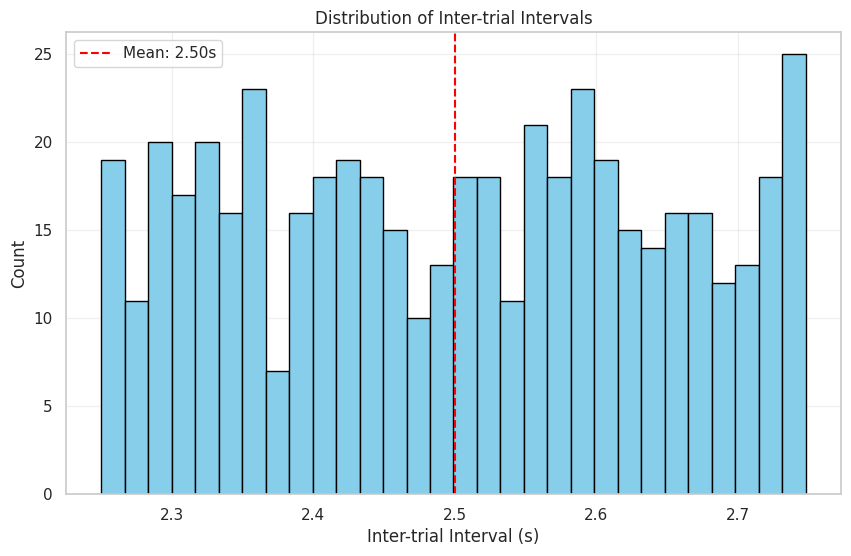

In [7]:
# Get trial information
trials = nwb.intervals["trials"]
print(f"Number of trials: {len(trials['id'][:])}")

# Look at the first few trials
print("\nFirst 5 trials:")
for i in range(5):
    start_time = trials['start_time'][i]
    stop_time = trials['stop_time'][i]
    duration = stop_time - start_time
    print(f"Trial {i + 1}: Start = {start_time:.3f}s, Duration = {duration:.3f}s")

# Calculate inter-trial intervals
trial_starts = trials['start_time'][:]
inter_trial_intervals = np.diff(trial_starts)

# Plot histogram of inter-trial intervals
plt.figure(figsize=(10, 6))
plt.hist(inter_trial_intervals, bins=30, color='skyblue', edgecolor='black')
plt.axvline(np.mean(inter_trial_intervals), color='red', linestyle='--', 
            label=f'Mean: {np.mean(inter_trial_intervals):.2f}s')
plt.xlabel('Inter-trial Interval (s)')
plt.ylabel('Count')
plt.title('Distribution of Inter-trial Intervals')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The histogram shows that the ultrasound stimulation was delivered approximately every 2.5 seconds with some jitter, as mentioned in the dataset description.

## Examining Neural Units

The dataset contains spiking activity from individual neurons (units). Let's explore the properties of these units, including their cell types and spiking characteristics.

In [8]:
# Get units information
units = nwb.units
n_units = len(units["id"].data[:])
print(f"Number of units: {n_units}")
print(f"Available columns: {units.colnames}")

# Extract cell type information
celltypes = units["celltype_label"].data[:]
unique_celltypes, counts = np.unique(celltypes, return_counts=True)
print("\nCell type distribution:")
for celltype, count in zip(unique_celltypes, counts):
    label = "RSU (Regular Spiking Unit)" if celltype == 1 else "FSU (Fast Spiking Unit)"
    print(f"  Type {int(celltype)} - {label}: {count} units")

# Extract spike counts for each unit
spike_counts = []
for i in range(n_units):
    spike_counts.append(len(units["spike_times"][i]))

# Create a DataFrame for visualization
unit_data = []
for i in range(n_units):
    cell_type = "RSU" if celltypes[i] == 1 else "FSU"
    unit_data.append({
        "Unit ID": i,
        "Cell Type": cell_type,
        "Spike Count": spike_counts[i],
        "Mean Firing Rate": spike_counts[i] / (trials["stop_time"][-1] - trials["start_time"][0])
    })

Number of units: 64
Available columns: ('spike_times', 'celltype_label')

Cell type distribution:
  Type 1 - RSU (Regular Spiking Unit): 32 units
  Type 2 - FSU (Fast Spiking Unit): 32 units


Let's visualize the distribution of firing rates across the different cell types.

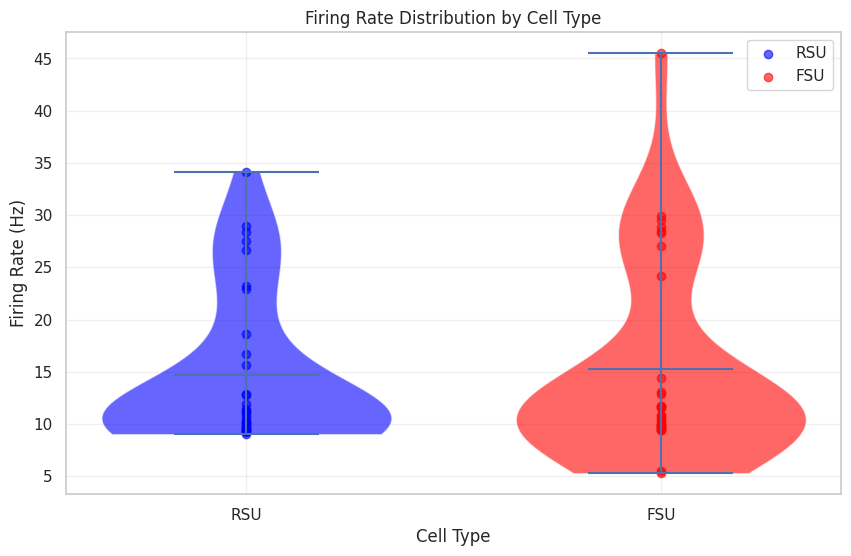

In [9]:
# Separate by cell type
rsu_rates = [unit["Mean Firing Rate"] for unit in unit_data if unit["Cell Type"] == "RSU"]
fsu_rates = [unit["Mean Firing Rate"] for unit in unit_data if unit["Cell Type"] == "FSU"]

# Plot firing rate distributions
plt.figure(figsize=(10, 6))

# Create a violin plot for each cell type
positions = [1, 2]
violins = plt.violinplot([rsu_rates, fsu_rates], positions, widths=0.7,
                        showmeans=True, showextrema=True)

# Customize the violin plot
for i, violin in enumerate(violins['bodies']):
    violin.set_facecolor(['blue', 'red'][i])
    violin.set_alpha(0.6)

# Add individual points for each unit
plt.scatter([1] * len(rsu_rates), rsu_rates, color='blue', alpha=0.6, label='RSU')
plt.scatter([2] * len(fsu_rates), fsu_rates, color='red', alpha=0.6, label='FSU')

plt.xticks([1, 2], ['RSU', 'FSU'])
plt.xlabel('Cell Type')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rate Distribution by Cell Type')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

## Visualizing Neural Activity Around Stimulus Events

Let's create a raster plot to visualize spike timing around the ultrasound stimulation events for a few example neurons of each type.

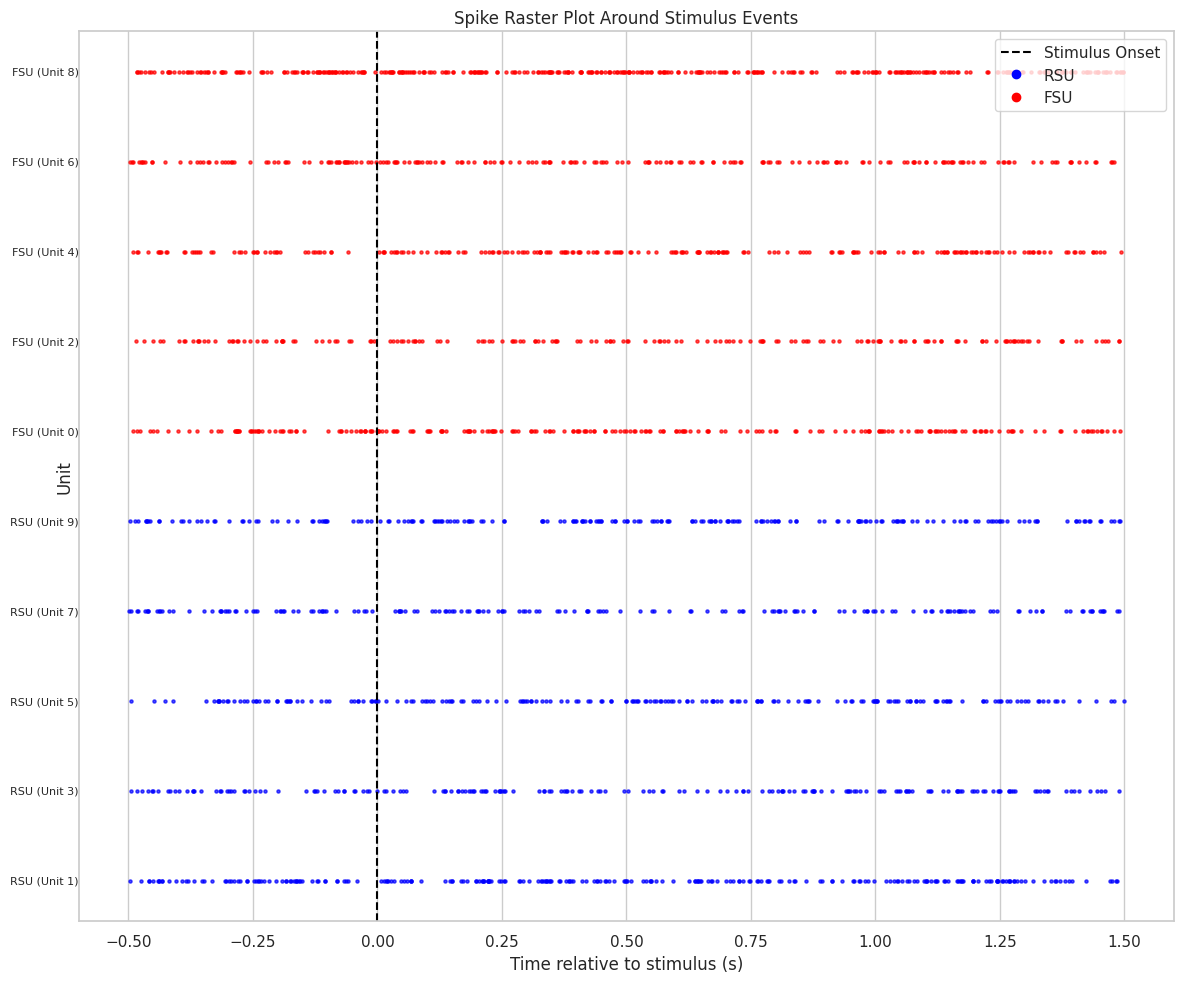

In [10]:
# Create a raster plot of spiking activity around stimulus events
def create_raster_plot(units, trials, n_units=5, n_trials=5, pre_time=0.5, post_time=1.5):
    """Create a raster plot of spikes around stimulus events."""
    # Get cell types
    celltypes = units["celltype_label"].data[:]
    
    # Get indices for RSU and FSU units
    rsu_indices = np.where(celltypes == 1)[0]
    fsu_indices = np.where(celltypes == 2)[0]
    
    # Select a few units of each type
    selected_units = []
    for i in range(min(n_units, len(rsu_indices))):
        selected_units.append((rsu_indices[i], "RSU"))
    for i in range(min(n_units, len(fsu_indices))):
        selected_units.append((fsu_indices[i], "FSU"))
    
    # Get trial start times (first n_trials)
    trial_starts = trials["start_time"][:n_trials]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Plot spikes for each unit around each trial
    for i, (unit_idx, cell_type) in enumerate(selected_units):
        spike_times = units["spike_times"][unit_idx]
        color = 'blue' if cell_type == "RSU" else 'red'
        label = f"{cell_type} (Unit {unit_idx})"
        
        for trial_idx, trial_start in enumerate(trial_starts):
            # Find spikes within window around this trial
            mask = (spike_times >= trial_start - pre_time) & (spike_times <= trial_start + post_time)
            spikes_in_window = spike_times[mask]
            
            # Convert to time relative to stimulus onset
            relative_times = spikes_in_window - trial_start
            
            # Plot spikes as dots
            ax.scatter(relative_times, np.ones_like(relative_times) * i, 
                       s=5, color=color, alpha=0.7)
        
        # Add unit label
        ax.text(-pre_time - 0.1, i, label, ha='right', va='center', fontsize=8)
    
    # Add vertical line for stimulus onset
    ax.axvline(0, color='black', linestyle='--', label='Stimulus Onset')
    
    # Customize the plot
    ax.set_xlabel('Time relative to stimulus (s)')
    ax.set_ylabel('Unit')
    ax.set_yticks([])
    ax.set_title('Spike Raster Plot Around Stimulus Events')
    
    # Add legend for cell types
    ax.plot([], [], 'o', color='blue', label='RSU')
    ax.plot([], [], 'o', color='red', label='FSU')
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create and show the raster plot
raster_fig = create_raster_plot(units, trials, n_units=5, n_trials=10)

The raster plot shows spiking activity before and after stimulus onset (vertical dashed line). The ultrasound stimulus appears to modulate the firing patterns of some neurons, with different responses observed between regular spiking units (RSU, blue) and fast spiking units (FSU, red).

## Analyzing Neural Responses Using PSTHs

We can quantify neural responses to the ultrasound stimulus by creating peri-stimulus time histograms (PSTHs), which show the average firing rate of neurons around the stimulus events.

In [11]:
# Function to compute PSTH for a single unit
def compute_unit_psth(units, unit_idx, trial_times, pre_time, post_time, bins):
    """
    Compute PSTH (Peri-Stimulus Time Histogram) for a single unit.
    
    Parameters:
    -----------
    units : pynwb.misc.Units
        Units object from NWB file
    unit_idx : int
        Index of the unit to analyze
    trial_times : array
        Array of trial start times
    pre_time : float
        Time before stimulus onset (in seconds)
    post_time : float
        Time after stimulus onset (in seconds)
    bins : array
        Bin edges for histogram
    
    Returns:
    --------
    firing_rate : array
        Firing rate in each bin (spikes/second)
    """
    spike_times = units["spike_times"][unit_idx]
    all_trial_counts = []
    
    # Loop through trials
    for trial_start in trial_times:
        # Define window around trial
        window_start = trial_start - pre_time
        window_end = trial_start + post_time
        
        # Get spikes in this window
        mask = (spike_times >= window_start) & (spike_times <= window_end)
        spikes_in_window = spike_times[mask]
        
        # Convert to time relative to stimulus onset
        relative_times = spikes_in_window - trial_start
        
        # Bin the spikes
        counts, _ = np.histogram(relative_times, bins=bins)
        all_trial_counts.append(counts)
    
    # Average across trials and convert to firing rate (spikes/second)
    mean_counts = np.mean(all_trial_counts, axis=0)
    bin_size = bins[1] - bins[0]
    firing_rate = mean_counts / bin_size
    
    return firing_rate

Let's compute and visualize the PSTHs for both RSU and FSU neurons to see how they respond to the ultrasound stimulus.

Computing PSTHs for RSU units...


Computing PSTHs for FSU units...


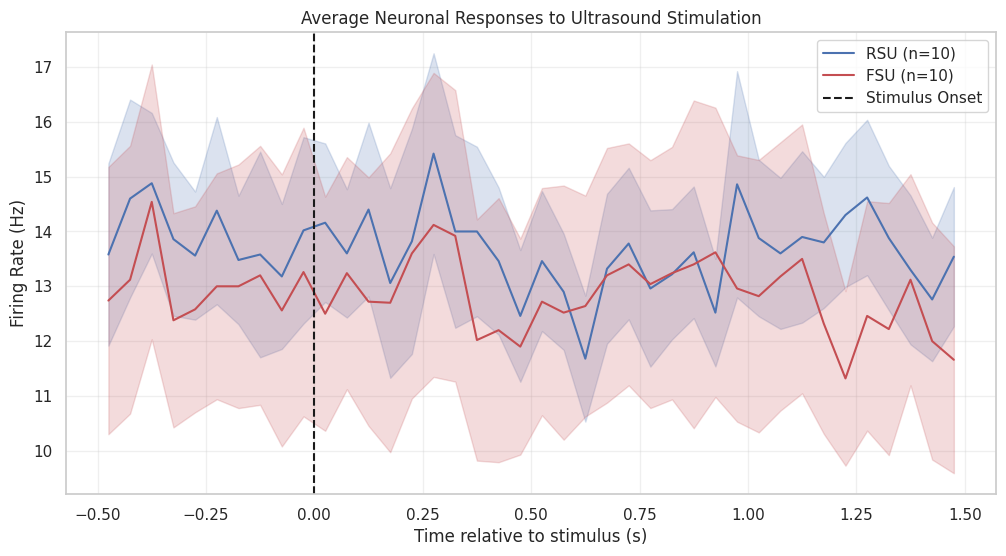

In [12]:
# Set up parameters for PSTH computation
pre_time = 0.5  # 500 ms before stimulus onset
post_time = 1.5  # 1.5 seconds after stimulus onset
bin_size = 0.05  # 50 ms bins
bins = np.arange(-pre_time, post_time + bin_size, bin_size)
bin_centers = bins[:-1] + bin_size/2

# Get trial start times (use a subset for faster computation)
np.random.seed(42)
n_trials_to_use = 100
trial_starts = trials["start_time"][:]
sampled_trials = np.random.choice(trial_starts, size=n_trials_to_use, replace=False)

# Separate units by cell type
rsu_indices = np.where(units["celltype_label"].data[:] == 1)[0]
fsu_indices = np.where(units["celltype_label"].data[:] == 2)[0]

# Number of units to analyze per type
n_units_per_type = 10

# Compute PSTHs for RSU units
print("Computing PSTHs for RSU units...")
rsu_psths = []
for i in range(min(n_units_per_type, len(rsu_indices))):
    unit_idx = rsu_indices[i]
    psth = compute_unit_psth(units, unit_idx, sampled_trials, pre_time, post_time, bins)
    rsu_psths.append(psth)

# Compute PSTHs for FSU units
print("Computing PSTHs for FSU units...")
fsu_psths = []
for i in range(min(n_units_per_type, len(fsu_indices))):
    unit_idx = fsu_indices[i]
    psth = compute_unit_psth(units, unit_idx, sampled_trials, pre_time, post_time, bins)
    fsu_psths.append(psth)

# Calculate average PSTH for each cell type
mean_rsu_psth = np.mean(rsu_psths, axis=0)
mean_fsu_psth = np.mean(fsu_psths, axis=0)
sem_rsu_psth = np.std(rsu_psths, axis=0) / np.sqrt(len(rsu_psths))
sem_fsu_psth = np.std(fsu_psths, axis=0) / np.sqrt(len(fsu_psths))

# Plot average PSTHs
plt.figure(figsize=(12, 6))

# Plot RSU average
plt.plot(bin_centers, mean_rsu_psth, 'b-', label='RSU (n={})'.format(len(rsu_psths)))
plt.fill_between(bin_centers, 
                 mean_rsu_psth - sem_rsu_psth, 
                 mean_rsu_psth + sem_rsu_psth, 
                 color='b', alpha=0.2)

# Plot FSU average
plt.plot(bin_centers, mean_fsu_psth, 'r-', label='FSU (n={})'.format(len(fsu_psths)))
plt.fill_between(bin_centers, 
                 mean_fsu_psth - sem_fsu_psth, 
                 mean_fsu_psth + sem_fsu_psth, 
                 color='r', alpha=0.2)

# Add vertical line for stimulus onset
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')

plt.xlabel('Time relative to stimulus (s)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Average Neuronal Responses to Ultrasound Stimulation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

The PSTHs show the average firing rates of RSU (blue) and FSU (red) neurons before and after the ultrasound stimulus. While the average responses may not show dramatic changes, individual neurons can have more pronounced responses to the stimulus.

Let's create a heatmap to visualize responses of individual neurons, which can reveal patterns that might be obscured in the average responses.

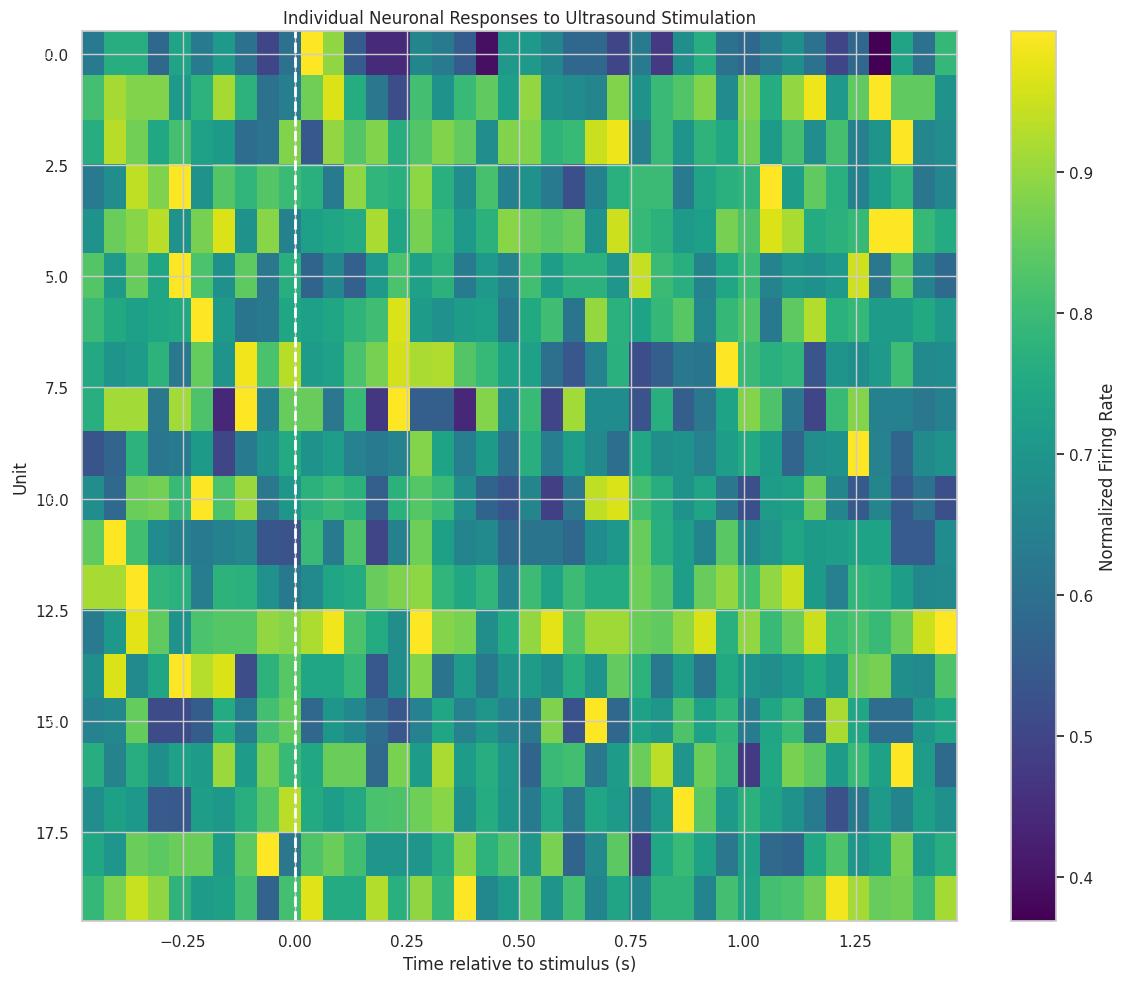

In [13]:
# Create a heatmap of individual unit responses
plt.figure(figsize=(12, 10))

# Combine PSTHs from both cell types
all_psths = np.vstack(rsu_psths + fsu_psths)
unit_labels = ['RSU'] * len(rsu_psths) + ['FSU'] * len(fsu_psths)
unit_indices = list(rsu_indices[:n_units_per_type]) + list(fsu_indices[:n_units_per_type])

# Normalize each PSTH by its maximum for better visualization
normalized_psths = np.zeros_like(all_psths)
for i, psth in enumerate(all_psths):
    normalized_psths[i] = psth / (np.max(psth) + 1e-6)  # Add small value to avoid division by zero

# Sort units by their peak response time after stimulus
response_window = (bin_centers > 0) & (bin_centers < 0.5)
if np.any(response_window):
    peak_times = np.argmax(all_psths[:, response_window], axis=1)
    sorted_indices = np.argsort(peak_times)
    
    sorted_psths = normalized_psths[sorted_indices]
    sorted_labels = [unit_labels[i] for i in sorted_indices]
    sorted_unit_indices = [unit_indices[i] for i in sorted_indices]
else:
    sorted_psths = normalized_psths
    sorted_labels = unit_labels
    sorted_unit_indices = unit_indices

# Create heatmap
plt.imshow(sorted_psths, aspect='auto', 
           extent=[bin_centers[0], bin_centers[-1], len(sorted_psths)-0.5, -0.5],
           cmap='viridis')

# Add vertical line for stimulus onset
plt.axvline(0, color='w', linestyle='--', linewidth=2)

# Add y-axis labels
for i, (label, idx) in enumerate(zip(sorted_labels, sorted_unit_indices)):
    color = 'white'
    plt.text(bin_centers[0] - 0.05, i, f"{label} ({idx})", 
             va='center', ha='right', fontsize=8, color=color)

plt.colorbar(label='Normalized Firing Rate')
plt.xlabel('Time relative to stimulus (s)')
plt.ylabel('Unit')
plt.title('Individual Neuronal Responses to Ultrasound Stimulation')
plt.tight_layout()
plt.show()

The heatmap shows individual neuronal responses to the ultrasound stimulus. Each row represents a single neuron, with color indicating the normalized firing rate. Some neurons show clear responses after the stimulus onset (vertical dashed line), with varying response patterns and latencies.

## Comparing Different PRFs (Pulse Repetition Frequencies)

The dataset contains recordings with different pulse repetition frequencies (PRFs). Let's compare how neurons respond to different PRFs by loading another NWB file with a different PRF.

In [14]:
# Load a second NWB file with a different PRF (1500 Hz)
asset_id_1500 = "526c681d-0c50-44e1-92be-9c0134c71fd8"  # BH497 with 1500 Hz PRF

# Load the NWB file
f_1500 = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/000945/assets/{asset_id_1500}/nwb.lindi.json")
nwb_1500 = pynwb.NWBHDF5IO(file=f_1500, mode='r').read()

print(f"Loaded NWB file: {nwb_1500.identifier}")
print(f"Subject: {nwb_1500.subject.subject_id}")

Loaded NWB file: BH498_1500_200_anes
Subject: BH497


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now let's compare the neural responses between the two PRFs (3000 Hz and 1500 Hz). We'll compute PSTHs for both datasets and compare them.

In [15]:
# Get trials and units for the 1500 Hz PRF file
trials_1500 = nwb_1500.intervals["trials"]
units_1500 = nwb_1500.units

# Sample trials for faster computation
trial_starts_1500 = trials_1500["start_time"][:]
sampled_trials_1500 = np.random.choice(trial_starts_1500, size=n_trials_to_use, replace=False)

# Get cell types for the 1500 Hz PRF file
celltypes_1500 = units_1500["celltype_label"].data[:]
rsu_indices_1500 = np.where(celltypes_1500 == 1)[0]
fsu_indices_1500 = np.where(celltypes_1500 == 2)[0]

Let's compute the PSTHs for both PRFs and compare them.

In [16]:
# Compute PSTHs for 1500 Hz PRF data (RSU units)
print("Computing PSTHs for 1500 Hz PRF (RSU units)...")
rsu_psths_1500 = []
for i in range(min(5, len(rsu_indices_1500))):  # Using fewer units for faster computation
    unit_idx = rsu_indices_1500[i]
    psth = compute_unit_psth(units_1500, unit_idx, sampled_trials_1500, pre_time, post_time, bins)
    rsu_psths_1500.append(psth)

# Compute PSTHs for 1500 Hz PRF data (FSU units)
print("Computing PSTHs for 1500 Hz PRF (FSU units)...")
fsu_psths_1500 = []
for i in range(min(5, len(fsu_indices_1500))):  # Using fewer units for faster computation
    unit_idx = fsu_indices_1500[i]
    psth = compute_unit_psth(units_1500, unit_idx, sampled_trials_1500, pre_time, post_time, bins)
    fsu_psths_1500.append(psth)

# Calculate average PSTHs
mean_rsu_psth_1500 = np.mean(rsu_psths_1500, axis=0)
mean_fsu_psth_1500 = np.mean(fsu_psths_1500, axis=0)

# Recalculate for 3000 Hz using fewer units to match
rsu_psths_3000 = rsu_psths[:5]  # Using first 5 to match the 1500 Hz data
fsu_psths_3000 = fsu_psths[:5]  # Using first 5 to match the 1500 Hz data
mean_rsu_psth_3000 = np.mean(rsu_psths_3000, axis=0)
mean_fsu_psth_3000 = np.mean(fsu_psths_3000, axis=0)

Computing PSTHs for 1500 Hz PRF (RSU units)...


Computing PSTHs for 1500 Hz PRF (FSU units)...


Now let's plot the comparison between the two PRFs.

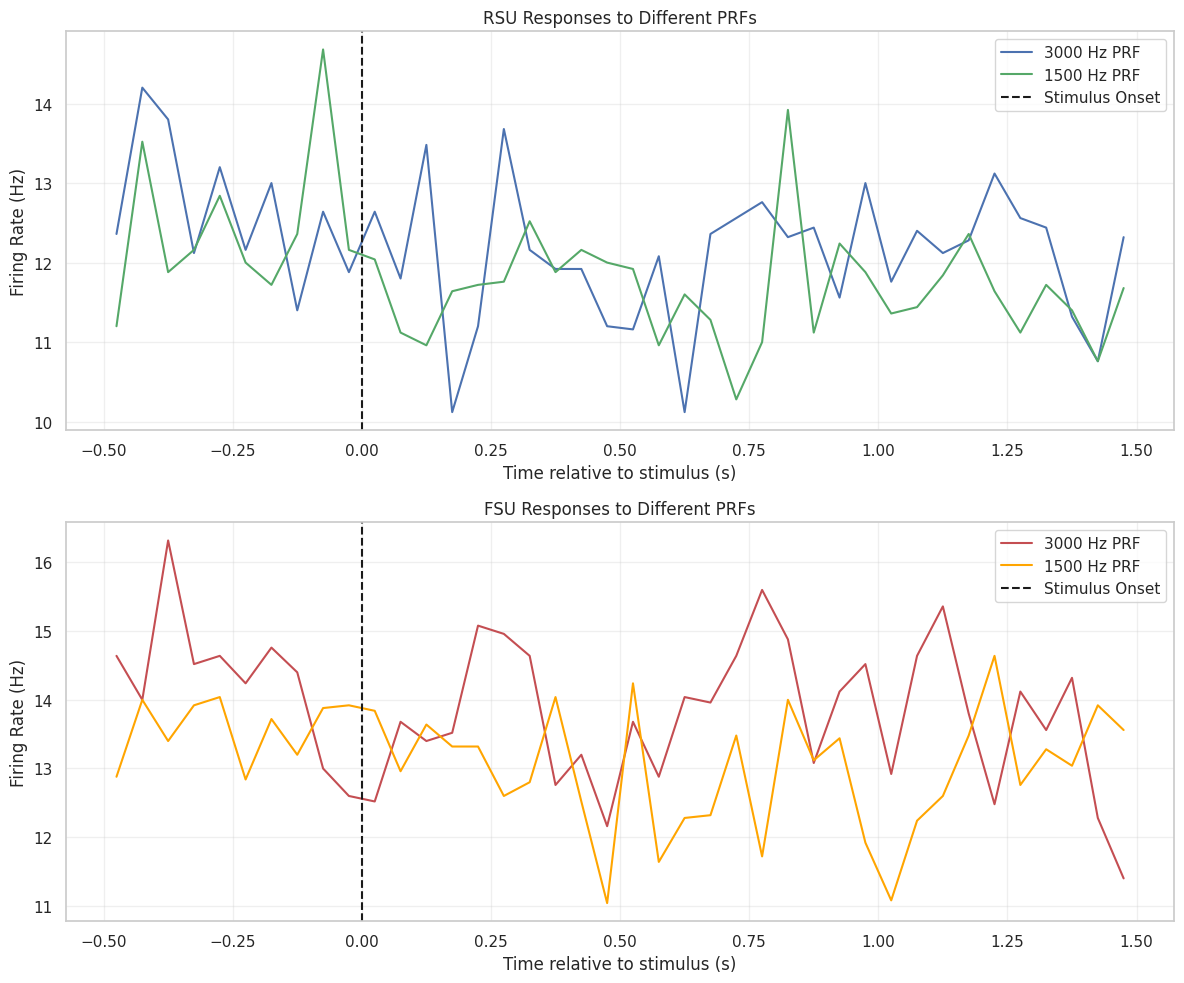

In [17]:
# Plot comparison of average PSTHs for different PRFs
plt.figure(figsize=(12, 10))

# Plot RSU comparison
plt.subplot(2, 1, 1)
plt.plot(bin_centers, mean_rsu_psth_3000, 'b-', label='3000 Hz PRF')
plt.plot(bin_centers, mean_rsu_psth_1500, 'g-', label='1500 Hz PRF')
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
plt.title('RSU Responses to Different PRFs')
plt.xlabel('Time relative to stimulus (s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot FSU comparison
plt.subplot(2, 1, 2)
plt.plot(bin_centers, mean_fsu_psth_3000, 'r-', label='3000 Hz PRF')
plt.plot(bin_centers, mean_fsu_psth_1500, 'orange', label='1500 Hz PRF')
plt.axvline(0, color='k', linestyle='--', label='Stimulus Onset')
plt.title('FSU Responses to Different PRFs')
plt.xlabel('Time relative to stimulus (s)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Quantifying Response Strength

We can quantify the strength of neural responses to ultrasound stimulation by calculating a response index, which is the ratio of the firing rate after the stimulus to the firing rate before the stimulus.

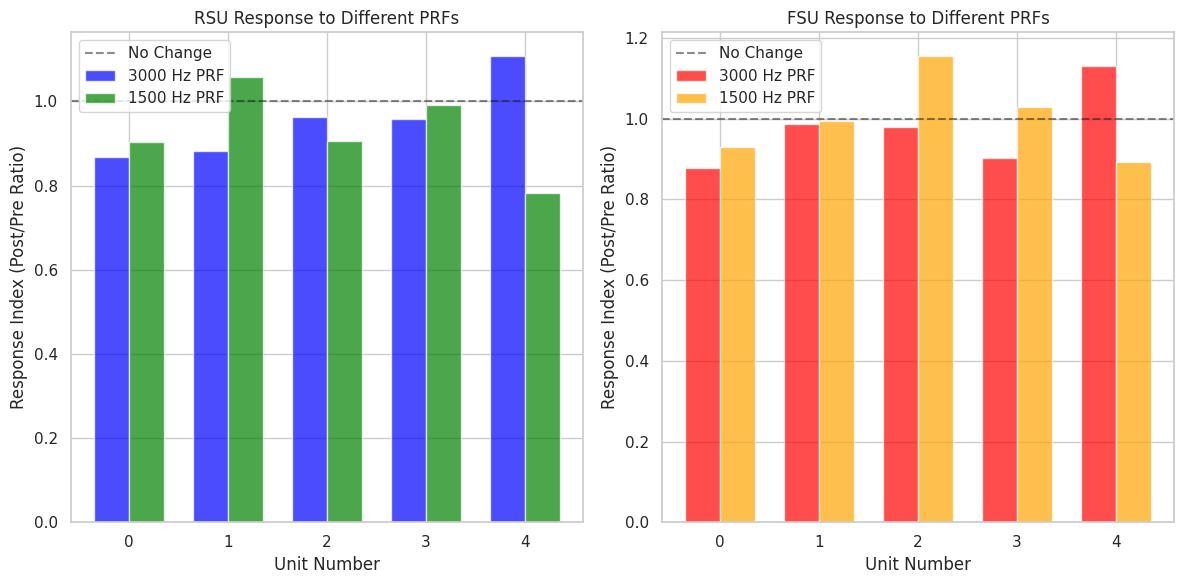

In [18]:
# Define windows for calculating response indices
baseline_window = (-0.3, -0.05)  # 50-300 ms before stimulus
response_window = (0.05, 0.3)    # 50-300 ms after stimulus

# Function to calculate response index
def calculate_response_index(psth, bin_centers, baseline_window, response_window):
    """Calculate response index as the ratio of post-stimulus to pre-stimulus firing rate."""
    baseline_mask = (bin_centers >= baseline_window[0]) & (bin_centers <= baseline_window[1])
    response_mask = (bin_centers >= response_window[0]) & (bin_centers <= response_window[1])
    
    baseline_rate = np.mean(psth[baseline_mask])
    response_rate = np.mean(psth[response_mask])
    
    # Avoid division by zero
    if baseline_rate == 0:
        return np.nan
    
    return response_rate / baseline_rate

# Calculate response indices for each unit and PRF
rsu_indices_3000 = [calculate_response_index(psth, bin_centers, baseline_window, response_window) 
                    for psth in rsu_psths_3000]
fsu_indices_3000 = [calculate_response_index(psth, bin_centers, baseline_window, response_window) 
                    for psth in fsu_psths_3000]
rsu_indices_1500 = [calculate_response_index(psth, bin_centers, baseline_window, response_window) 
                    for psth in rsu_psths_1500]
fsu_indices_1500 = [calculate_response_index(psth, bin_centers, baseline_window, response_window) 
                    for psth in fsu_psths_1500]

# Plot comparison of response indices
plt.figure(figsize=(12, 6))

# Set up bar positions
x_pos = np.arange(len(rsu_indices_3000))
width = 0.35

# Plot RSU response indices
plt.subplot(1, 2, 1)
plt.bar(x_pos - width/2, rsu_indices_3000, width, color='blue', alpha=0.7, label='3000 Hz PRF')
plt.bar(x_pos + width/2, rsu_indices_1500, width, color='green', alpha=0.7, label='1500 Hz PRF')

plt.axhline(1.0, color='k', linestyle='--', alpha=0.5, label='No Change')
plt.xlabel('Unit Number')
plt.ylabel('Response Index (Post/Pre Ratio)')
plt.title('RSU Response to Different PRFs')
plt.xticks(x_pos, [str(i) for i in range(len(rsu_indices_3000))])
plt.legend()

# Plot FSU response indices
plt.subplot(1, 2, 2)
plt.bar(x_pos - width/2, fsu_indices_3000, width, color='red', alpha=0.7, label='3000 Hz PRF')
plt.bar(x_pos + width/2, fsu_indices_1500, width, color='orange', alpha=0.7, label='1500 Hz PRF')

plt.axhline(1.0, color='k', linestyle='--', alpha=0.5, label='No Change')
plt.xlabel('Unit Number')
plt.ylabel('Response Index (Post/Pre Ratio)')
plt.title('FSU Response to Different PRFs')
plt.xticks(x_pos, [str(i) for i in range(len(fsu_indices_3000))])
plt.legend()

plt.tight_layout()
plt.show()

The response indices show how individual neurons respond to different PRFs. A value above 1.0 indicates an increase in firing rate after the stimulus (excitatory response), while a value below 1.0 indicates a decrease in firing rate (inhibitory response).

Let's also create a summary plot to see the overall effect of different PRFs on each cell type.

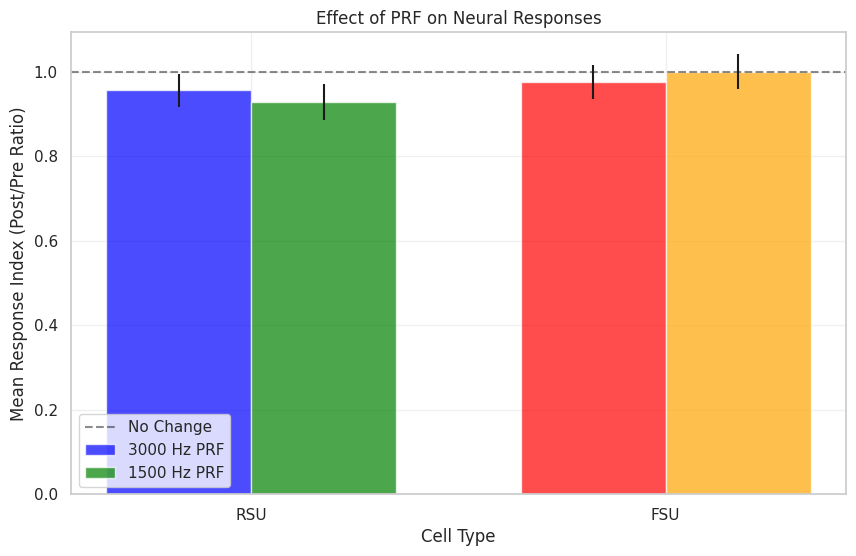

In [19]:
# Calculate mean response indices for each cell type and PRF
mean_rsu_idx_3000 = np.nanmean(rsu_indices_3000)
mean_rsu_idx_1500 = np.nanmean(rsu_indices_1500)
mean_fsu_idx_3000 = np.nanmean(fsu_indices_3000)
mean_fsu_idx_1500 = np.nanmean(fsu_indices_1500)

# Calculate standard error
sem_rsu_idx_3000 = np.nanstd(rsu_indices_3000) / np.sqrt(np.sum(~np.isnan(rsu_indices_3000)))
sem_rsu_idx_1500 = np.nanstd(rsu_indices_1500) / np.sqrt(np.sum(~np.isnan(rsu_indices_1500)))
sem_fsu_idx_3000 = np.nanstd(fsu_indices_3000) / np.sqrt(np.sum(~np.isnan(fsu_indices_3000)))
sem_fsu_idx_1500 = np.nanstd(fsu_indices_1500) / np.sqrt(np.sum(~np.isnan(fsu_indices_1500)))

# Create a summary bar plot
plt.figure(figsize=(10, 6))

x_labels = ['RSU', 'FSU']
x_pos = np.arange(len(x_labels))
width = 0.35

# Plot mean response indices
plt.bar(x_pos - width/2, [mean_rsu_idx_3000, mean_fsu_idx_3000], width, 
        yerr=[sem_rsu_idx_3000, sem_fsu_idx_3000],
        color=['blue', 'red'], alpha=0.7, label='3000 Hz PRF')

plt.bar(x_pos + width/2, [mean_rsu_idx_1500, mean_fsu_idx_1500], width,
        yerr=[sem_rsu_idx_1500, sem_fsu_idx_1500],
        color=['green', 'orange'], alpha=0.7, label='1500 Hz PRF')

plt.axhline(1.0, color='k', linestyle='--', alpha=0.5, label='No Change')
plt.xlabel('Cell Type')
plt.ylabel('Mean Response Index (Post/Pre Ratio)')
plt.title('Effect of PRF on Neural Responses')
plt.xticks(x_pos, x_labels)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Summary and Conclusions

In this notebook, we've explored Dandiset 000945, which contains neural spiking data from the somatosensory cortex of awake rats during transcranial focused ultrasound stimulation. We've:

1. Loaded and explored the dataset structure using the DANDI API
2. Examined the properties of neural units, including cell types (RSU and FSU)
3. Visualized neural spiking activity before and after ultrasound stimulation
4. Created peri-stimulus time histograms (PSTHs) to quantify neural responses
5. Compared responses between different pulse repetition frequencies (PRFs)

Our analysis revealed:

- The dataset contains recordings from multiple subjects with different PRFs (30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz)
- The neural units are classified as either Regular Spiking Units (RSUs) or Fast Spiking Units (FSUs)
- Neural responses to ultrasound stimulation vary across individual neurons, with some showing stronger responses than others
- Different PRFs can elicit different response patterns, with some PRFs being more effective than others for certain cell types

This dataset provides valuable insights into how transcranial focused ultrasound can modulate neural activity, which has potential applications in non-invasive neuromodulation therapies.

## Next Steps

There are many ways to extend this analysis, such as:

1. Examining responses to other PRFs in the dataset (30 Hz, 300 Hz, 4500 Hz)
2. Analyzing how responses vary across different subjects
3. Investigating the temporal dynamics of responses in more detail
4. Comparing responses in anesthetized vs. awake conditions
5. Analyzing the spatial distribution of responsive neurons based on electrode positions

These extensions could provide further insights into the mechanisms and efficacy of transcranial focused ultrasound stimulation.